In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
df = pd.read_csv('Monthly_oil_data.csv' , index_col='Production Date', parse_dates=True)

In [3]:
df.head()

,Volume
Production Date,
2015-01-01,67515553.0
2015-02-01,61664960.0
2015-03-01,66342950.0
2015-04-01,67719040.0
2015-05-01,66484591.0


### Lag features

In [4]:
target_col = 'Volume'
LAGS = [1, 2, 3, 6, 12, 24]

for lag in LAGS:
    df[f'lag_{lag}'] = df[target_col].shift(lag)

df[[target_col] + [f'lag_{l}' for l in LAGS]].head(30)

,Volume,lag_1,lag_2,lag_3,lag_6,lag_12,lag_24
Production Date,,,,,,,
2015-01-01,67515553.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,61664960.0,67515553.0,NaN,NaN,NaN,NaN,NaN
2015-03-01,66342950.0,61664960.0,67515553.0,NaN,NaN,NaN,NaN
2015-04-01,67719040.0,66342950.0,61664960.0,67515553.0,NaN,NaN,NaN
2015-05-01,66484591.0,67719040.0,66342950.0,61664960.0,NaN,NaN,NaN
2015-06-01,64029313.0,66484591.0,67719040.0,66342950.0,NaN,NaN,NaN
2015-07-01,70581810.0,64029313.0,66484591.0,67719040.0,67515553.0,NaN,NaN
2015-08-01,72445837.0,70581810.0,64029313.0,66484591.0,61664960.0,NaN,NaN
2015-09-01,70795329.0,72445837.0,70581810.0,64029313.0,66342950.0,NaN,NaN


In [5]:
df['pct_change_1'] = df[target_col].pct_change()
df['pct_change_3'] = df[target_col].pct_change(3)

In [6]:
df_fe = df.dropna().copy()

print("Shape before:", df.shape)
print("Shape after feature engineering:", df_fe.shape)

Shape before: (125, 9)
Shape after feature engineering: (101, 9)


In [7]:
feature_cols = [
    col for col in df_fe.columns if col != target_col
]

print("Selected features:")
for col in feature_cols:
    print(col)

Selected features:
lag_1
lag_2
lag_3
lag_6
lag_12
lag_24
pct_change_1
pct_change_3


In [8]:
corr = df_fe[feature_cols + [target_col]].corr()[target_col].sort_values(ascending=False)

corr

Volume          1.000000
lag_2           0.877875
lag_1           0.874339
lag_3           0.857797
lag_12          0.807774
lag_6           0.788868
lag_24          0.751303
pct_change_1    0.219494
pct_change_3    0.202018
Name: Volume, dtype: float64

In [9]:
X = df_fe[feature_cols]
y = df_fe[target_col]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (101, 8)
y shape: (101,)


### Rolling statistics

#### SMA

#### Window Size = 3

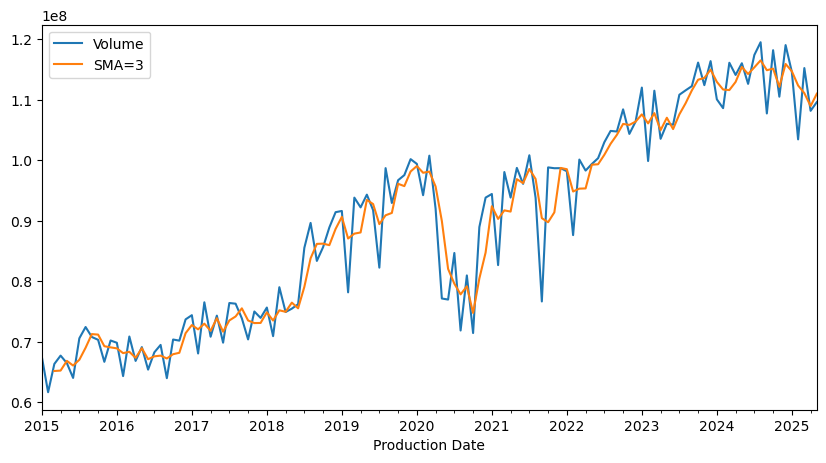

In [10]:
df['SMA=3'] = df['Volume'].rolling(3).mean() 
df[['Volume', 'SMA=3']].plot(figsize=(10,5));

#### Window Size = 6

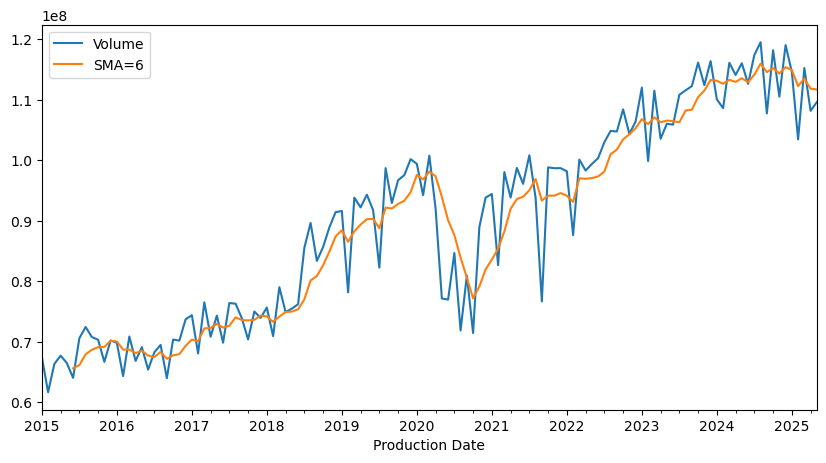

In [11]:
df['SMA=6'] = df['Volume'].rolling(6).mean()
df[['Volume', 'SMA=6']].plot(figsize=(10,5));

#### Window Size = 12

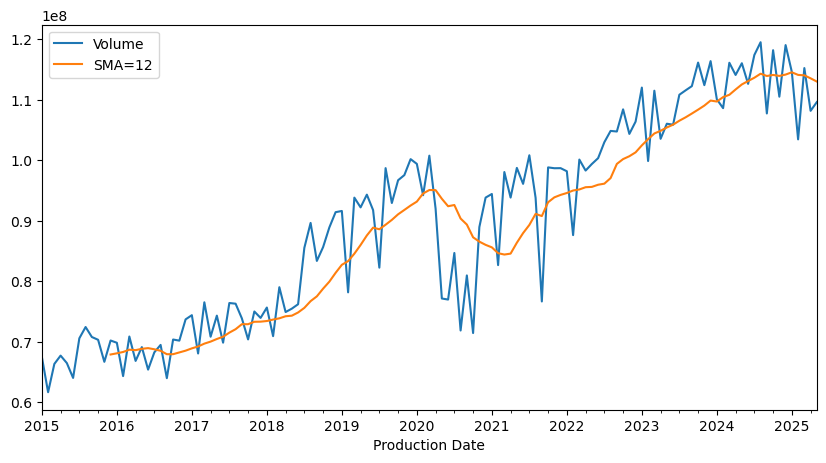

In [12]:
df['SMA=12'] = df['Volume'].rolling(12).mean() 
df[['Volume', 'SMA=12']].plot(figsize=(10,5));

### Conclusions

1. Predictions based on closer lagged observations are more accurate than those using more distant lag values.
2. Seasonal lags, such as a 12-month period, also improve prediction accuracy.